In [2]:
import os
import pandas as pd
from functools import reduce
from tqdm import tqdm

# Set your data folder path
data_folder = r'C:\StudySources\Master\ERP\Datasets\2021'

# Find all CSV files in the folder
csv_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

print(f"Reading {len(csv_files)} files...")

# Read files with progress bar
for file in tqdm(csv_files, desc='Loading files', unit='file'):
    try:
        df = pd.read_csv(file, low_memory=False, dtype={
            '2021 super output area - lower layer': 'category',
            'mnemonic': 'category'
        })

        # Check if required columns exist
        if all(col in df.columns for col in ['2021 super output area - lower layer', 'mnemonic']):
            dfs.append(df.drop_duplicates())
        else:
            print(f"Skipping {file} (missing required columns)")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Merge all DataFrames using outer join, avoiding duplicate columns
print("Merging dataframes...")

def merge_avoiding_duplicates(left, right):
    # Only keep columns in right that are not in left, except the keys
    keys = [ 'mnemonic']
    right_unique = right[[col for col in right.columns if col not in left.columns or col in keys]]
    return pd.merge(left, right_unique, on=keys, how='outer')

combined_df = reduce(merge_avoiding_duplicates, tqdm(dfs, desc="Merging", unit="merge"))
combined_df.drop_duplicates(inplace=True)

# Save result
output_path = os.path.join(data_folder, 'combined_output.csv')
combined_df.to_csv(output_path, index=False)

print(f"Merge complete. Output saved to: {output_path}")


Reading 19 files...


Loading files: 100%|██████████| 19/19 [00:00<00:00, 170.63file/s]


Merging dataframes...


Merging: 100%|██████████| 19/19 [00:00<00:00, 316.66merge/s]


Merge complete. Output saved to: C:\StudySources\Master\ERP\Datasets\2021\combined_output.csv


In [1]:
import os
import pandas as pd
from functools import reduce
from tqdm import tqdm

# Set your data folder path
data_folder = r'C:\StudySources\Master\ERP\Datasets\2011'

# Find all CSV files in the folder
csv_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

print(f"Reading {len(csv_files)} files...")

# Read files with progress bar
for file in tqdm(csv_files, desc='Loading files', unit='file'):
    try:
        df = pd.read_csv(file, low_memory=False, dtype={
            '2011 super output area - lower layer': 'category',
            'mnemonic': 'category'
        })

        # Check if required columns exist
        if all(col in df.columns for col in ['2011 super output area - lower layer', 'mnemonic']):
            dfs.append(df.drop_duplicates())
        else:
            print(f"Skipping {file} (missing required columns)")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Merge all DataFrames using outer join, avoiding duplicate columns
print("Merging dataframes...")

def merge_avoiding_duplicates(left, right):
    # Only keep columns in right that are not in left, except the keys
    keys = ['mnemonic']
    right_unique = right[[col for col in right.columns if col not in left.columns or col in keys]]
    return pd.merge(left, right_unique, on=keys, how='outer')

combined_df = reduce(merge_avoiding_duplicates, tqdm(dfs, desc="Merging", unit="merge"))
combined_df.drop_duplicates(inplace=True)

# Save result
output_path = os.path.join(data_folder, 'combined_output.csv')
combined_df.to_csv(output_path, index=False)

print(f"Merge complete. Output saved to: {output_path}")


Reading 20 files...


Loading files: 100%|██████████| 20/20 [00:00<00:00, 141.66file/s]


Merging dataframes...


Merging: 100%|██████████| 20/20 [00:00<00:00, 305.52merge/s]


Merge complete. Output saved to: C:\StudySources\Master\ERP\Datasets\2011\combined_output.csv


## Random Forest

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\StudySources\Master\ERP\Datasets\2021\combined_output.csv')


In [2]:
df

,2021 super output area - lower layer,mnemonic,Total population 16+,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,Aged 50 to 64 years,Aged 65 years and over,Total car van,No cars or vans in household,...,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work
0,Bolton 005A,E01004766,677.0,76.0,152.0,232.0,204.0,13.0,805.0,278.0,...,0.0,9.0,22.0,23.0,1.0,372.0,38.0,4.0,47.0,9.0
1,Bolton 005B,E01004767,876.0,97.0,234.0,286.0,236.0,23.0,857.0,231.0,...,3.0,14.0,24.0,20.0,3.0,454.0,58.0,5.0,74.0,14.0
2,Bolton 001A,E01004768,842.0,98.0,132.0,254.0,325.0,33.0,613.0,35.0,...,0.0,4.0,5.0,1.0,1.0,473.0,29.0,3.0,23.0,11.0
3,Bolton 003A,E01004769,773.0,67.0,142.0,265.0,279.0,20.0,679.0,73.0,...,0.0,6.0,11.0,6.0,1.0,451.0,22.0,6.0,27.0,7.0
4,Bolton 003B,E01004770,638.0,57.0,114.0,230.0,208.0,29.0,611.0,70.0,...,1.0,6.0,11.0,8.0,0.0,376.0,35.0,4.0,27.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,Manchester 064B,E01034138,419.0,44.0,111.0,160.0,96.0,8.0,453.0,215.0,...,0.0,3.0,92.0,8.0,1.0,162.0,21.0,24.0,42.0,6.0
1735,Oldham 036A,E01034232,464.0,66.0,120.0,196.0,70.0,12.0,434.0,163.0,...,22.0,3.0,33.0,12.0,0.0,232.0,33.0,1.0,37.0,17.0
1736,Oldham 036B,E01034233,487.0,41.0,134.0,209.0,79.0,24.0,432.0,148.0,...,22.0,1.0,21.0,26.0,0.0,229.0,46.0,2.0,50.0,20.0
1737,Rochdale 008H,E01034234,569.0,93.0,171.0,217.0,75.0,13.0,459.0,135.0,...,13.0,9.0,24.0,27.0,4.0,285.0,51.0,3.0,53.0,21.0


In [3]:
df = df.iloc[:, 2:]

In [4]:
df

,Total population 16+,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,Aged 50 to 64 years,Aged 65 years and over,Total car van,No cars or vans in household,1 car or van in household,2 cars or vans in household,...,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work
0,677.0,76.0,152.0,232.0,204.0,13.0,805.0,278.0,320.0,157.0,...,0.0,9.0,22.0,23.0,1.0,372.0,38.0,4.0,47.0,9.0
1,876.0,97.0,234.0,286.0,236.0,23.0,857.0,231.0,410.0,164.0,...,3.0,14.0,24.0,20.0,3.0,454.0,58.0,5.0,74.0,14.0
2,842.0,98.0,132.0,254.0,325.0,33.0,613.0,35.0,181.0,284.0,...,0.0,4.0,5.0,1.0,1.0,473.0,29.0,3.0,23.0,11.0
3,773.0,67.0,142.0,265.0,279.0,20.0,679.0,73.0,322.0,221.0,...,0.0,6.0,11.0,6.0,1.0,451.0,22.0,6.0,27.0,7.0
4,638.0,57.0,114.0,230.0,208.0,29.0,611.0,70.0,280.0,205.0,...,1.0,6.0,11.0,8.0,0.0,376.0,35.0,4.0,27.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,419.0,44.0,111.0,160.0,96.0,8.0,453.0,215.0,200.0,27.0,...,0.0,3.0,92.0,8.0,1.0,162.0,21.0,24.0,42.0,6.0
1735,464.0,66.0,120.0,196.0,70.0,12.0,434.0,163.0,155.0,91.0,...,22.0,3.0,33.0,12.0,0.0,232.0,33.0,1.0,37.0,17.0
1736,487.0,41.0,134.0,209.0,79.0,24.0,432.0,148.0,158.0,89.0,...,22.0,1.0,21.0,26.0,0.0,229.0,46.0,2.0,50.0,20.0
1737,569.0,93.0,171.0,217.0,75.0,13.0,459.0,135.0,200.0,87.0,...,13.0,9.0,24.0,27.0,4.0,285.0,51.0,3.0,53.0,21.0


In [5]:
# Fill only numeric columns with their mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Columns: 177 entries, Total population 16+ to Other method of travel to work
dtypes: float64(176), object(1)
memory usage: 2.3+ MB


In [7]:
target_cols = ['Underground, metro, light rail, tram', 'Train', 'Bus, minibus or coach', 'Taxi', 'Motorcycle, scooter or moped', 'Driving a car or van', 'Passenger in a car or van', 'Bicycle', 'On foot', 'Other method of travel to work']
# The target columns are already defined in the variable `target_cols`
print("Target columns:", target_cols)

Target columns: ['Underground, metro, light rail, tram', 'Train', 'Bus, minibus or coach', 'Taxi', 'Motorcycle, scooter or moped', 'Driving a car or van', 'Passenger in a car or van', 'Bicycle', 'On foot', 'Other method of travel to work']


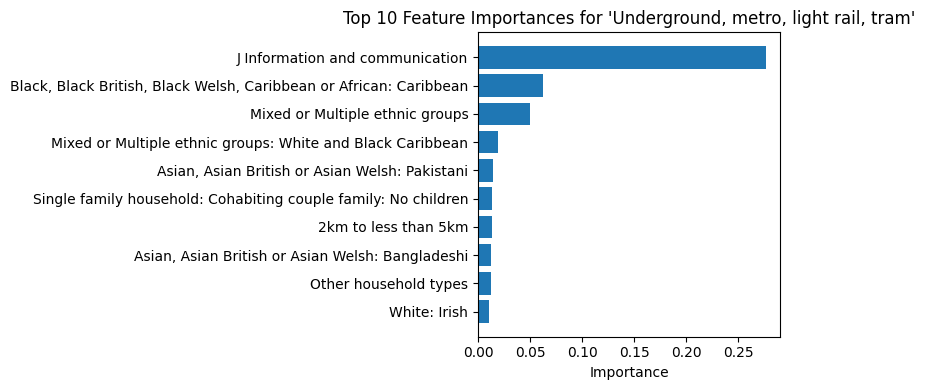

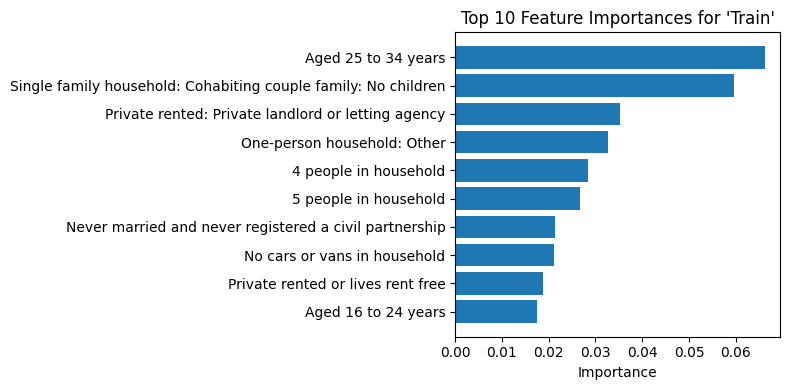

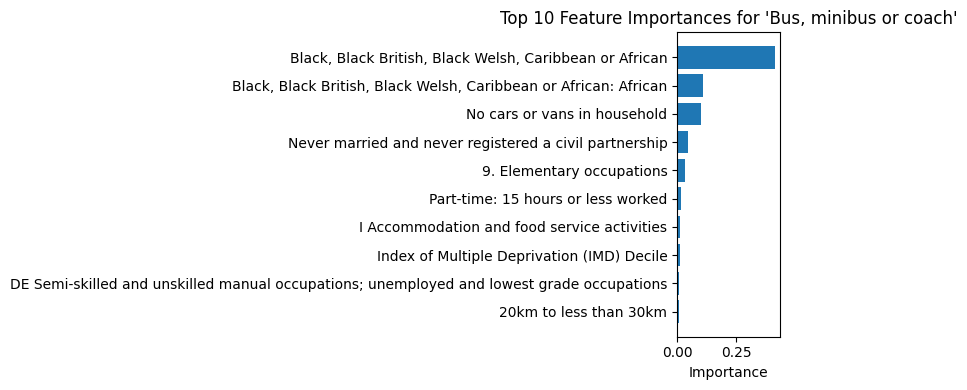

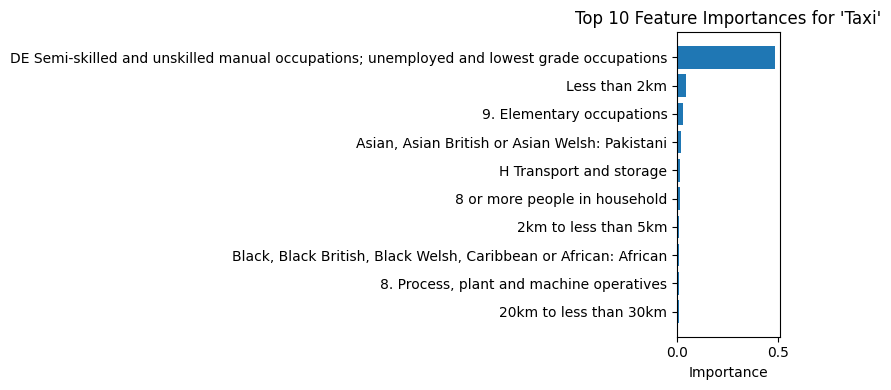

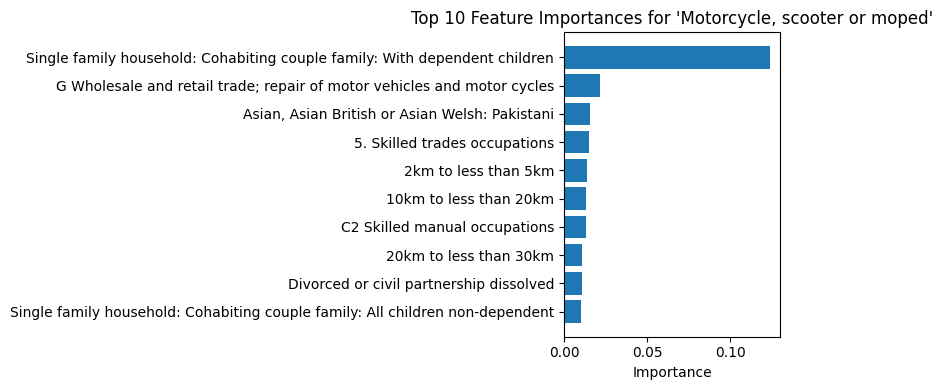

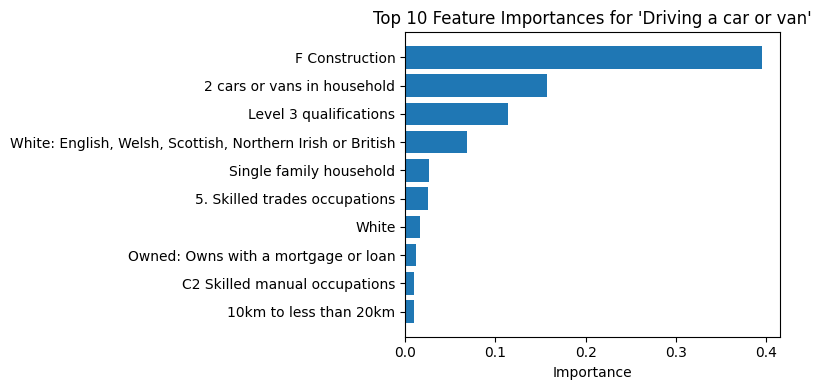

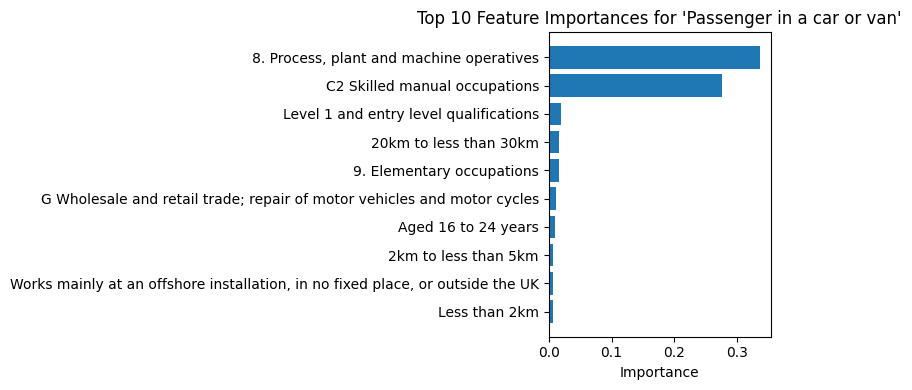

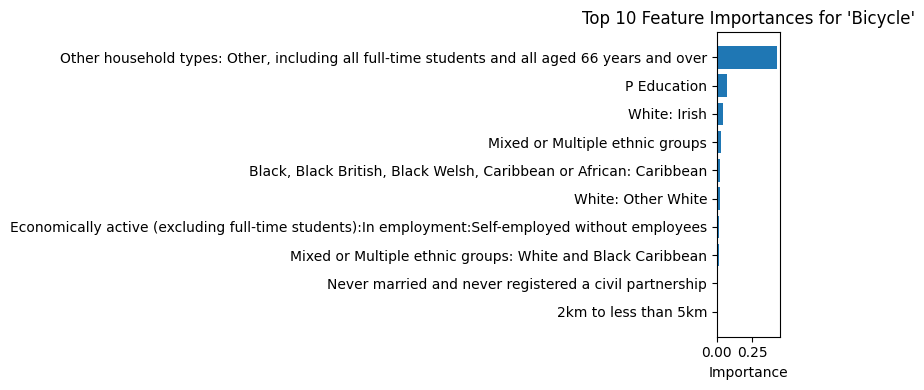

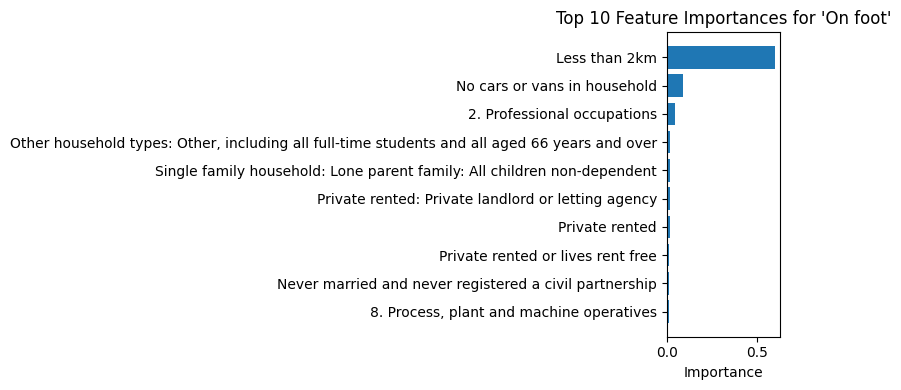

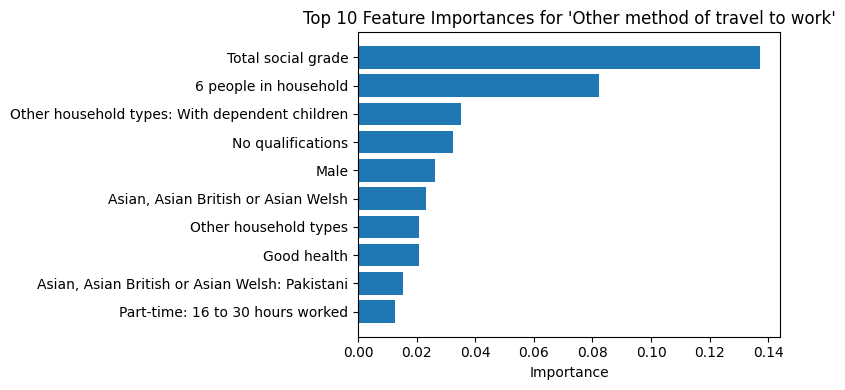

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Features: all numeric columns except the target columns
feature_cols = [col for col in numeric_cols if col not in target_cols]
X = df[feature_cols]
y = df[target_cols]

# Fit a random forest for each target and plot feature importances
for target in target_cols:
    y_target = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    importances = rf.feature_importances_
    indices = importances.argsort()[::-1][:10]  # Top 10 features

    plt.figure(figsize=(8, 4))
    plt.title(f"Top 10 Feature Importances for '{target}'")
    plt.barh([feature_cols[i] for i in indices][::-1], importances[indices][::-1])
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

In [10]:
import numpy as np

# Exclude target columns from feature engineering
features = df.drop(columns=target_cols)

# Example feature engineering:
# 1. Create new features based on existing ones
features['age_16_64'] = features['Aged 16 to 24 years'] + features['Aged 25 to 34 years'] + features['Aged 35 to 49 years'] + features['Aged 50 to 64 years']
features['car_ownership_rate'] = features['Total car van'] / (features['Total population 16+'] + 1e-6)
features['employment_rate'] = features['Economically active (excluding full-time students):In employment'] / (features['Total: All usual residents aged 16 years and over'] + 1e-6)
features['population_density_log'] = features['population density'].apply(lambda x: np.log1p(x))

# 2. Fill any new NaNs (if created)
features = features.fillna(0)

# 3. If you want to concatenate engineered features back to the original df (excluding targets):
df_engineered = pd.concat([features, df[target_cols]], axis=1)

df_engineered.head()

C:\Users\Harry.Xie\AppData\Local\Temp\ipykernel_13976\2107400595.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features['age_16_64'] = features['Aged 16 to 24 years'] + features['Aged 25 to 34 years'] + features['Aged 35 to 49 years'] + features['Aged 50 to 64 years']
C:\Users\Harry.Xie\AppData\Local\Temp\ipykernel_13976\2107400595.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features['car_ownership_rate'] = features['Total car van'] / (features['Total population 16+'] + 1e-6)
C:\Users\Harry.Xie\AppData\Local\Temp\i

,Total population 16+,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,Aged 50 to 64 years,Aged 65 years and over,Total car van,No cars or vans in household,1 car or van in household,2 cars or vans in household,...,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work
0,677.0,76.0,152.0,232.0,204.0,13.0,805.0,278.0,320.0,157.0,...,0.0,9.0,22.0,23.0,1.0,372.0,38.0,4.0,47.0,9.0
1,876.0,97.0,234.0,286.0,236.0,23.0,857.0,231.0,410.0,164.0,...,3.0,14.0,24.0,20.0,3.0,454.0,58.0,5.0,74.0,14.0
2,842.0,98.0,132.0,254.0,325.0,33.0,613.0,35.0,181.0,284.0,...,0.0,4.0,5.0,1.0,1.0,473.0,29.0,3.0,23.0,11.0
3,773.0,67.0,142.0,265.0,279.0,20.0,679.0,73.0,322.0,221.0,...,0.0,6.0,11.0,6.0,1.0,451.0,22.0,6.0,27.0,7.0
4,638.0,57.0,114.0,230.0,208.0,29.0,611.0,70.0,280.0,205.0,...,1.0,6.0,11.0,8.0,0.0,376.0,35.0,4.0,27.0,4.0


cluster
1    635
0    619
3    229
4    177
2     79
Name: count, dtype: int64


C:\Users\Harry.Xie\AppData\Local\Temp\ipykernel_13976\3891567754.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features['cluster'] = clusters


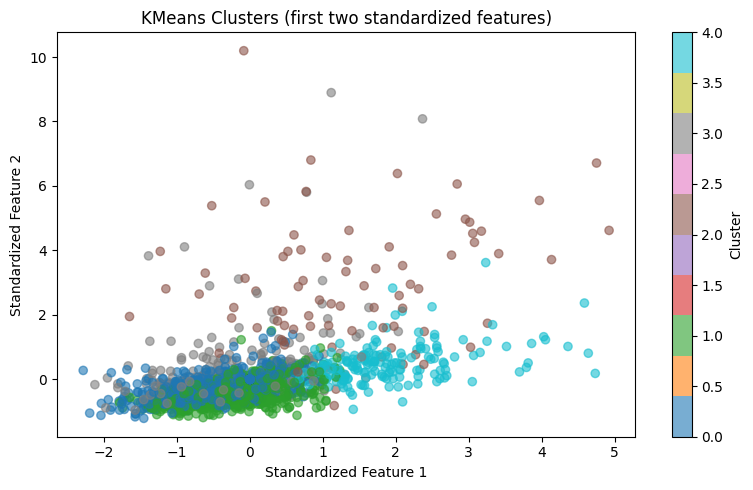

In [18]:
from sklearn.cluster import KMeans

# Standardize features before clustering
X_cluster = scaler.fit_transform(features[feature_cols])

# Fit KMeans with, e.g., 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster)

# Add cluster labels to the dataframe
features['cluster'] = clusters

# Show cluster counts
print(features['cluster'].value_counts())

# Optionally, visualize clusters using the first two PCA components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=clusters, cmap='tab10', alpha=0.6)
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.title('KMeans Clusters (first two standardized features)')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features[feature_cols])

# Fit PCA to reduce to, e.g., 10 components
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance (10 components):", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.23315237 0.20267965 0.12555996 0.0872752  0.03610992 0.02730923
 0.02526283 0.01417377 0.01350205 0.01141826]
Total explained variance (10 components): 0.7764432234867259


In [12]:
from sklearn.decomposition import FactorAnalysis

# Use the engineered features for factor analysis
X_fa = features[feature_cols]

# Standardize features before factor analysis
X_fa_scaled = scaler.fit_transform(X_fa)

# Fit Factor Analysis with, e.g., 5 factors (can adjust n_components)
fa = FactorAnalysis(n_components=5, random_state=42)
X_factors = fa.fit_transform(X_fa_scaled)

# Correlate factors with each target column
factor_df = pd.DataFrame(X_factors, columns=[f'Factor_{i+1}' for i in range(X_factors.shape[1])])
correlations = factor_df.join(y).corr().loc[[f'Factor_{i+1}' for i in range(X_factors.shape[1])], target_cols]

print("Correlation between factors and target columns:")
print(correlations)

Correlation between factors and target columns:
          Underground, metro, light rail, tram     Train  \
Factor_1                              0.310509  0.365105   
Factor_2                             -0.038180 -0.005451   
Factor_3                              0.071642  0.048572   
Factor_4                              0.482298  0.364594   
Factor_5                             -0.012319 -0.072273   

          Bus, minibus or coach      Taxi  Motorcycle, scooter or moped  \
Factor_1               0.257014  0.100557                      0.142302   
Factor_2               0.384829  0.284884                      0.128328   
Factor_3               0.556648  0.659681                      0.025873   
Factor_4               0.300416  0.111182                     -0.217687   
Factor_5              -0.112333 -0.123927                     -0.329374   

          Driving a car or van  Passenger in a car or van   Bicycle   On foot  \
Factor_1              0.511135                   0.205076  

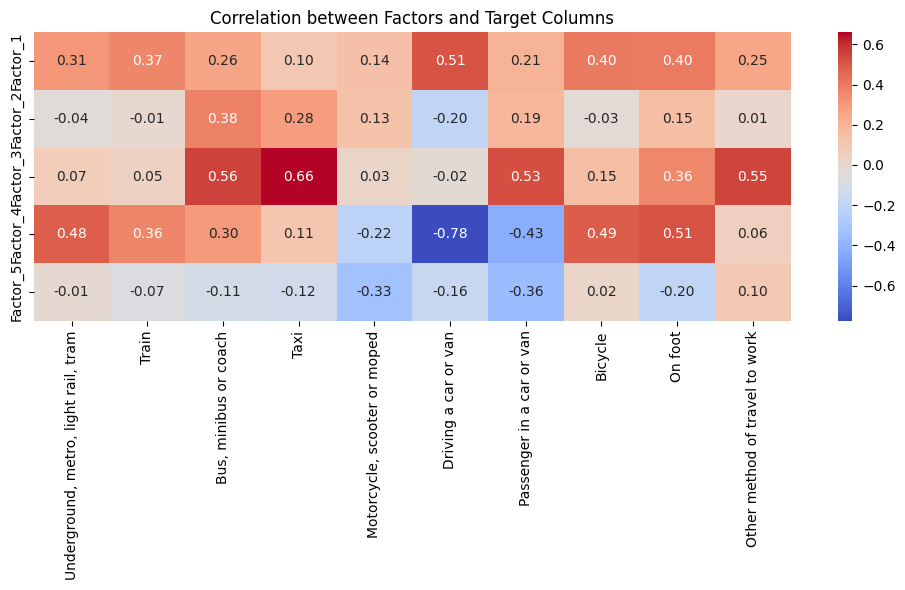

In [17]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Factors and Target Columns")
plt.tight_layout()
plt.show()

In [16]:
# Show top 10 contributing features for each factor
n_top = 10
loadings = pd.DataFrame(fa.components_.T, index=feature_cols, columns=[f'Factor_{i+1}' for i in range(fa.n_components)])

for factor in loadings.columns:
    print(f"\nTop {n_top} features for {factor}:")
    print(loadings[factor].abs().sort_values(ascending=False).head(n_top))

    


Top 10 features for Factor_1:
Total employee                                                                                0.952258
Total: All usual residents aged 16 years and over in employment the week before the census    0.952233
Total population 16+                                                                          0.952156
Economically active (excluding full-time students):In employment                              0.937758
Economically active (excluding full-time students):In employment:Employee                     0.936885
Total car van                                                                                 0.903599
Total: All households                                                                         0.903538
Full-time: 31 to 48 hours worked                                                              0.894228
Full-time                                                                                     0.885783
Economically active (excluding full-time s

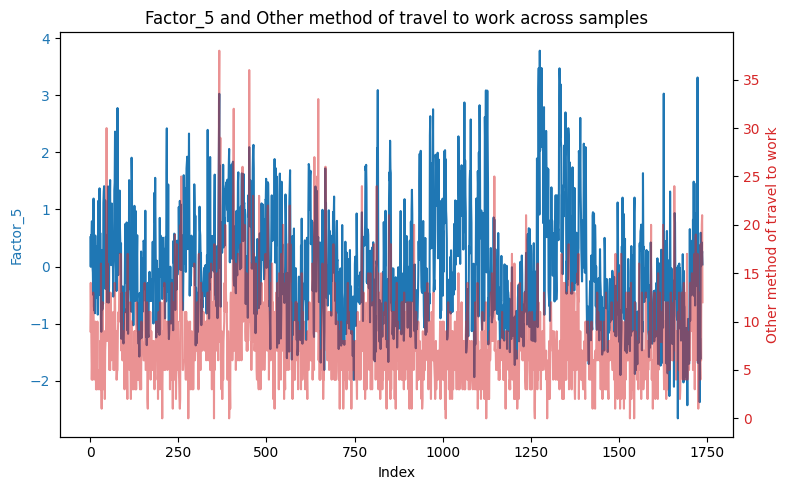

In [14]:
import matplotlib.pyplot as plt

# Plot the distribution of the selected factor (Factor_5) and the target variable
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Index')
ax1.set_ylabel(factor, color=color)
ax1.plot(factor_df[factor].values, color=color, label=factor)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel(target, color=color)
ax2.plot(y[target].values, color=color, alpha=0.5, label=target)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f"{factor} and {target} across samples")
fig.tight_layout()
plt.show()